In [371]:
#import packages to make a tree map
import squarify

In [372]:
#import python docx
from docx import Document
from docx.shared import Inches

In [373]:

# importing necessary packages for data handling
import os
import pandas as pd
import numpy as np

In [374]:
# Opening the file as a dataframe
wfc_data = pd.read_csv('Workforce_commission/WFC_Oct23.csv')

In [375]:
wfc_data.head()

,Internal ID,Department,"ALB, Agency, Business Unit or Organisation",Post Code,Region,Profession,Dept Job Title,Job Family,Job Role,Role Level,...,Age,Religion,Disability,FTE (Person),Gross (base) Salary\n (Actual not FTE),Location Related Allowance\n (Actual not FTE),"All Other Allowances\n (eg RRA, Actual not FTE)",Total Pay \n (Actual salary plus actual allowances),Contractor Day Rate (excluding VAT and agency fees),Estimated pay
0,OCT2300001,DHSC,UKHSA,NaN,South West (England),"Digital, Data and Technology",Senior ICT Engineer 1st Line support,IT operations,Infrastructure engineer,Senior infrastructure engineer,...,NaN,NaN,NaN,1.0,"£37,418.90",NaN,NaN,"£37,418.90",NaN,"£37,418.90"
1,OCT2300002,DHSC,UKHSA,NaN,London,"Digital, Data and Technology",Senior ICT Engineer,IT operations,Infrastructure engineer,Infrastructure engineer,...,NaN,NaN,NaN,1.0,"£41,276.20",NaN,NaN,"£41,276.20",NaN,"£41,276.20"
2,OCT2300003,DHSC,UKHSA,NaN,South West (England),"Digital, Data and Technology",Senior Specialist Engineer Information Security,Architecture,Security architect,Security architect,...,NaN,NaN,NaN,1.0,"£52,736.00","£5,009.90",NaN,"£57,745.90",NaN,"£57,745.90"
3,OCT2300004,DHSC,UKHSA,NaN,Yorkshire and the Humber,"Digital, Data and Technology",Enterprise Architect,QAT,Test engineer,Senior test engineer,...,NaN,NaN,NaN,1.0,"£64,276.10","£6,106.20",NaN,"£70,382.30",NaN,"£70,382.30"
4,OCT2300005,DHSC,UKHSA,NaN,London,"Digital, Data and Technology",919PQB1-OffPayrollBucketPost,Software development,Software developer,Developer,...,NaN,NaN,NaN,1.0,"£41,853.00",£0.00,NaN,"£41,853.00",NaN,"£41,853.00"


In [376]:
#List all departments in the data set

department_list = wfc_data['Department'].unique()
print(department_list)

['DHSC' 'DEFRA' 'DBT' 'Cabinet Office' 'DCMS' 'DESNZ & DSIT' 'DfT' 'DLUHC'
 'FCDO' 'FCDO RSO' 'FSA' 'MoJ' 'HMRC' 'HM Treasury' 'DSIT' 'MoD' 'Ofqual'
 'ONS' 'Scottish Gov' 'DfE' 'UKEF' 'Welsh Gov' 'Home Office' 'DWP']


In [377]:
#Provide headcounts for each department
department_headcounts = wfc_data['Department'].value_counts()
print(department_headcounts)

Department
Home Office       7846
DWP               5260
HMRC              3874
MoD               3364
MoJ               2173
DfT               2095
Scottish Gov      1914
DLUHC             1414
Cabinet Office    1400
ONS               1389
DEFRA             1360
DfE               1288
DSIT              1183
DBT                876
DHSC               608
FCDO               414
Welsh Gov          370
DESNZ & DSIT       289
FCDO RSO           172
UKEF                96
HM Treasury         82
FSA                 64
DCMS                40
Ofqual              40
Name: count, dtype: int64


In [378]:
#import package to generate visualisations
import seaborn as sns
import matplotlib.pyplot as plt

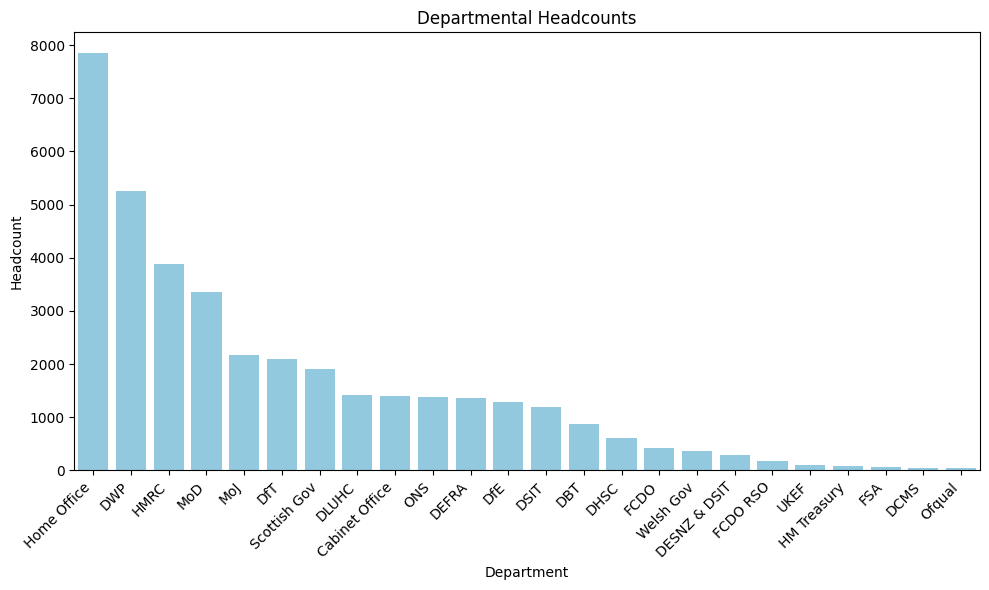

In [379]:
#create visual of workforce commission headcounts
#bar chart using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=department_headcounts.index, y=department_headcounts.values, color='skyblue')  # Create the bar plot
plt.title('Departmental Headcounts')  # Set the title of the plot
plt.xlabel('Department')  # Set the label for the x-axis
plt.ylabel('Headcount')  # Set the label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

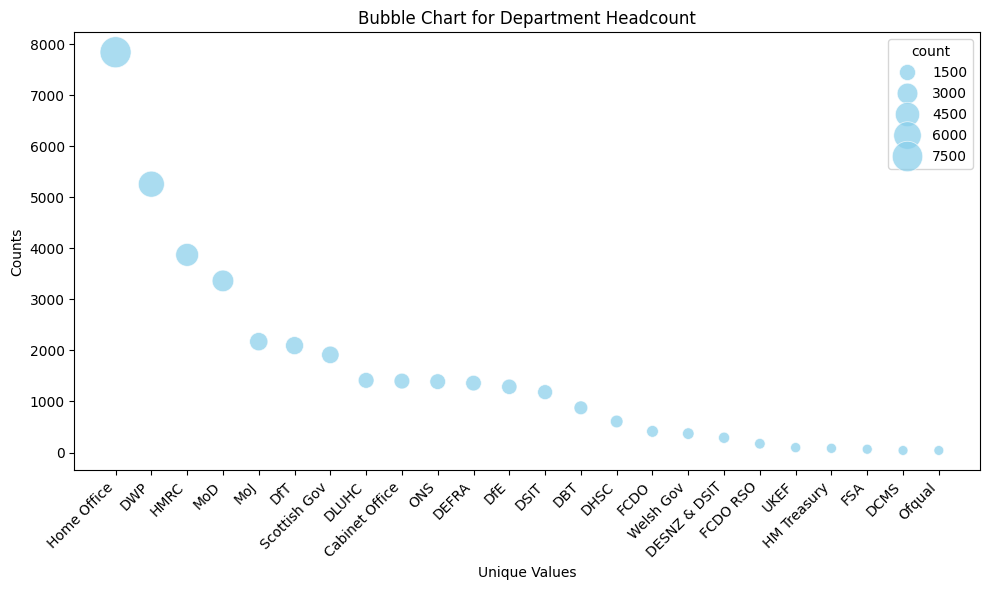

In [380]:
#Create a bubble chart from a scatterplot
# Create a DataFrame for plotting
plot_data = pd.DataFrame({'unique_value': department_headcounts.index, 'count': department_headcounts.values})

# Create a bubble chart using Seaborn scatterplot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(data=plot_data, x='unique_value', y='count', size='count', sizes=(50, 500), color='skyblue', alpha=0.7)  # Create the bubble chart
plt.title('Bubble Chart for Department Headcount')  # Set the title of the plot
plt.xlabel('Unique Values')  # Set the label for the x-axis
plt.ylabel('Counts')  # Set the label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

In [381]:
#Calculate total headcount
Total_headcount = wfc_data['Department'].count()
print("Total headcount:", Total_headcount)

Total headcount: 37611


In [382]:
#Filter out vacancies from the workforce commission dataset
wfc_excluding_vacancies = wfc_data[wfc_data['Role Status']!= 'Vacancy']

#1.2 Count total filled headcount
Filled_headcount = wfc_excluding_vacancies['Department'].count()
print("Filled headcount:",Filled_headcount)

Filled headcount: 32124


In [383]:
#Count total filled headcount by department
Filled_department_headcount = wfc_excluding_vacancies['Department'].value_counts()
print("Filled department headcount:",Filled_department_headcount)

Filled department headcount: Department
Home Office       7164
DWP               4439
HMRC              3868
MoD               2439
DfT               1834
Scottish Gov      1691
MoJ               1439
DLUHC             1245
Cabinet Office    1243
DfE               1217
DSIT              1084
ONS               1006
DEFRA              916
DBT                664
DHSC               550
FCDO               349
Welsh Gov          294
DESNZ & DSIT       281
FCDO RSO           119
UKEF                85
HM Treasury         71
FSA                 55
DCMS                36
Ofqual              35
Name: count, dtype: int64


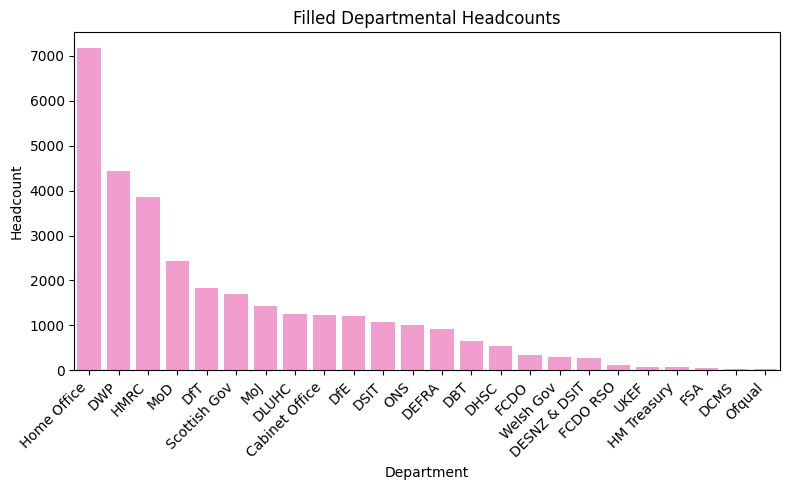

In [384]:
#create visual of workforce commission filled headcounts
#bar chart using Seaborn
plt.figure(figsize=(8, 5))  # Set the figure size
sns.barplot(x=Filled_department_headcount.index, y=Filled_department_headcount.values, color='#ff8fcf')  # Create the bar plot
plt.title('Filled Departmental Headcounts')  # Set the title of the plot
plt.xlabel('Department')  # Set the label for the x-axis
plt.ylabel('Headcount')  # Set the label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

In [385]:
#Create a colour pallete
custom_palette = sns.color_palette(["#aaca00","#ffdc00","#ff82ce","#ff7500","#11b2ae","#807dd5"])

/var/folders/l8/xlbdr9nd5sn3q7t9dd5lkqq80000gp/T/ipykernel_26860/167882375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  headcount_barplot = sns.barplot(x=Filled_department_headcount.index, y=Filled_department_headcount.values, palette=custom_palette)  # Create the bar plot with colour pallete
/var/folders/l8/xlbdr9nd5sn3q7t9dd5lkqq80000gp/T/ipykernel_26860/167882375.py:3: UserWarning: 
The palette list has fewer values (6) than needed (24) and will cycle, which may produce an uninterpretable plot.
  headcount_barplot = sns.barplot(x=Filled_department_headcount.index, y=Filled_department_headcount.values, palette=custom_palette)  # Create the bar plot with colour pallete


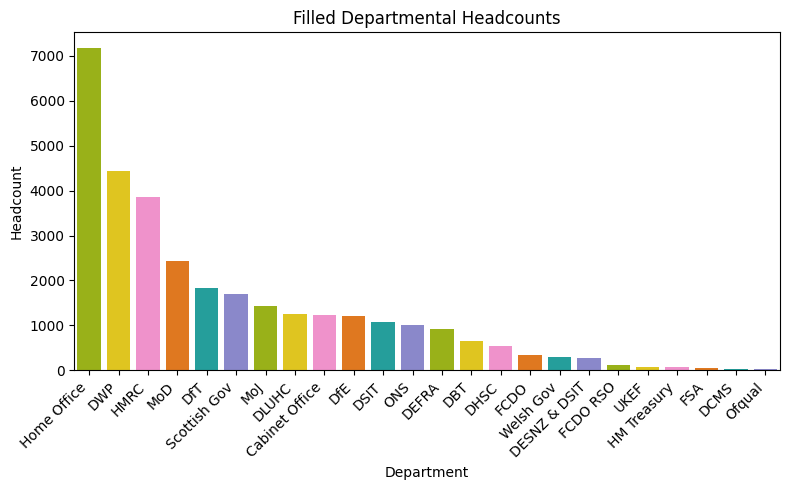

In [386]:
#Apply colour palette
plt.figure(figsize=(8, 5))  # Set the figure size
headcount_barplot = sns.barplot(x=Filled_department_headcount.index, y=Filled_department_headcount.values, palette=custom_palette)  # Create the bar plot with colour pallete
plt.title('Filled Departmental Headcounts')  # Set the title of the plot
plt.xlabel('Department')  # Set the label for the x-axis
plt.ylabel('Headcount')  # Set the label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

In [387]:
#import packages to make a tree map
import squarify

In [388]:
# Create a DataFrame for plotting filled headcount
filled_plot_data = pd.DataFrame({'unique_value': Filled_department_headcount.index, 'count': Filled_department_headcount.values})

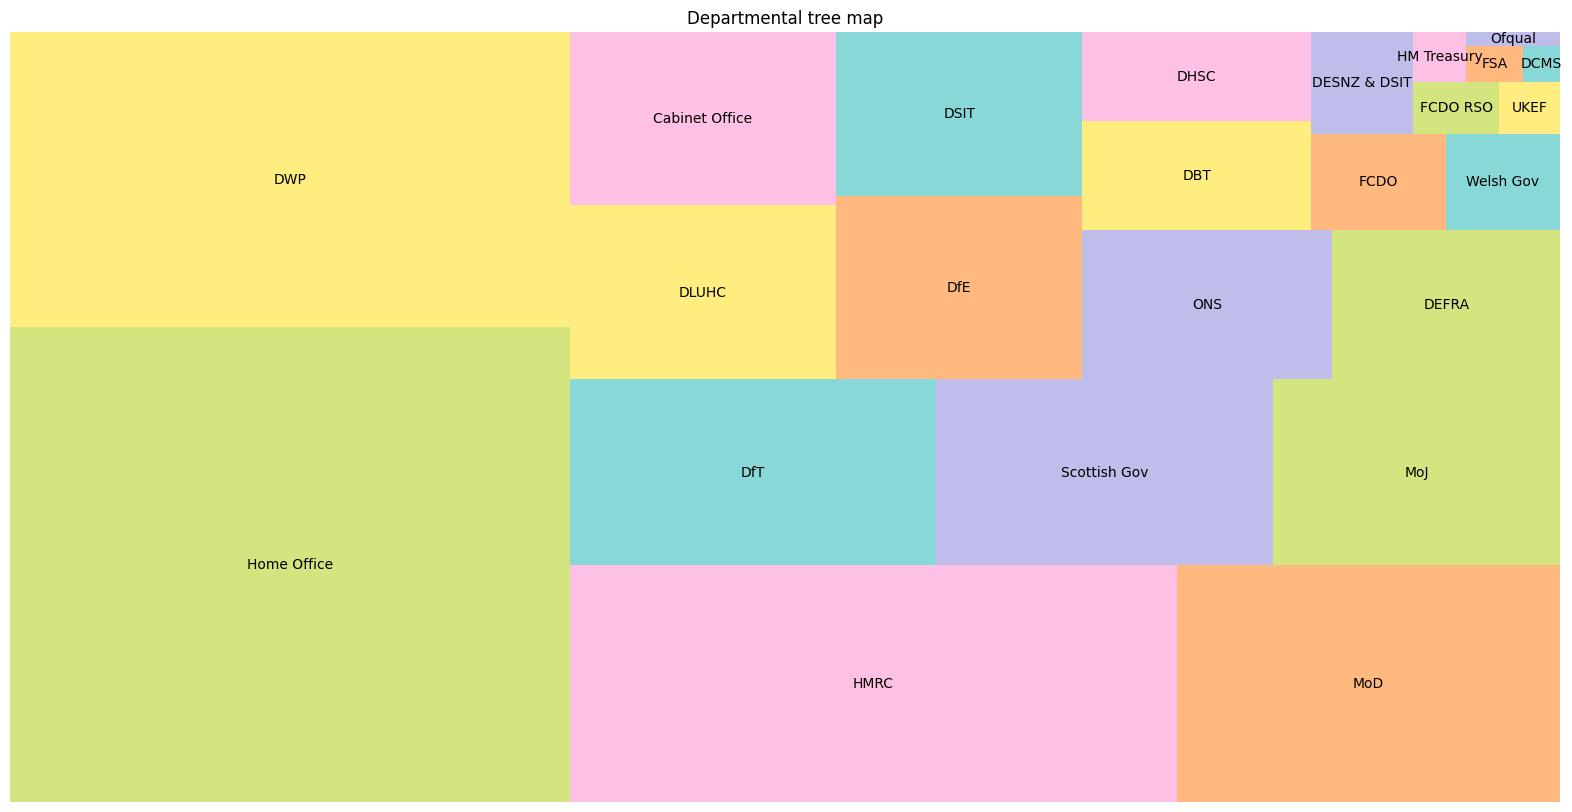

In [389]:
#Plot a tree map
plt.figure(figsize=(20, 10))
squarify.plot(sizes=filled_plot_data['count'], label=filled_plot_data['unique_value'], color = custom_palette, alpha=0.5)
plt.axis('off')
plt.title('Departmental tree map')
plt.show()

In [390]:
#Vacancy numbers
Total_vacancies = Total_headcount - Filled_headcount

#3.1 Vacancy percentage
Vacancy_percentage = Total_vacancies/Total_headcount

In [391]:
print(Vacancy_percentage)

0.14588817101379917


In [392]:
#Summary of stats so far
#Heacount
print("Total headcount:", Total_headcount)

#Count total filled headcount
print("Filled headcount:",Filled_headcount)

#Department headcounts
print(department_headcounts)

#Filled department headcounts
print(Filled_department_headcount)

#Vacancy numbers
print("Total vacancies:", Total_vacancies)

#Vacancy percentage
print("Vacancy percentage:", Vacancy_percentage)

Total headcount: 37611
Filled headcount: 32124
Department
Home Office       7846
DWP               5260
HMRC              3874
MoD               3364
MoJ               2173
DfT               2095
Scottish Gov      1914
DLUHC             1414
Cabinet Office    1400
ONS               1389
DEFRA             1360
DfE               1288
DSIT              1183
DBT                876
DHSC               608
FCDO               414
Welsh Gov          370
DESNZ & DSIT       289
FCDO RSO           172
UKEF                96
HM Treasury         82
FSA                 64
DCMS                40
Ofqual              40
Name: count, dtype: int64
Department
Home Office       7164
DWP               4439
HMRC              3868
MoD               2439
DfT               1834
Scottish Gov      1691
MoJ               1439
DLUHC             1245
Cabinet Office    1243
DfE               1217
DSIT              1084
ONS               1006
DEFRA              916
DBT                664
DHSC               550
FCDO    

In [393]:
# 2.1 Count top filled roles
Top_filled_roles = wfc_excluding_vacancies['Job Role'].value_counts().head(5)
print("Top filled roles:",Top_filled_roles)

Top filled roles: Job Role
Software developer         3031
Delivery manager           2364
Business analyst           1992
Infrastructure engineer    1672
Product manager            1403
Name: count, dtype: int64


In [394]:
#Show vacanct roles
wfc_vacancies = wfc_data[wfc_data['Role Status']== 'Vacancy']
#Count total vacancy headcount by job role
Vacancy_job_role_headcount = wfc_vacancies['Job Role'].value_counts()
print(Vacancy_job_role_headcount)

Job Role
Software developer                        697
Delivery manager                          375
Business analyst                          368
Development operations DevOps engineer    310
Product manager                           266
Infrastructure engineer                   266
Technical architect                       218
User researcher                           205
Test engineer                             166
Content designer                          158
Data scientist                            155
Data engineer                             129
IT service manager                        119
Data analyst                              112
Service designer                          100
Application operations engineer            95
End user computing engineer                87
Data architect                             79
Interaction designer                       73
Service desk manager                       64
Quality Assurance Testing QAT analyst      57
Performance analyst      

In [395]:
#2.3 Employee grade breakdown
Employee_grade_counts = wfc_excluding_vacancies['Employee Grade'].value_counts()
print(Employee_grade_counts)

Employee Grade
5 - SEO      7636
6 - G7       6664
4 - HEO      5425
3 - EO       2767
7 - G6       2503
2 - AO        443
8 - SCS1      276
9 - SCS2       60
1 - AA         41
10 - SCS3       4
Name: count, dtype: int64


In [396]:
#Count all grades
sum(Employee_grade_counts)

25819

In [397]:
#Count total SCS and filled SCS and breakdown
SCS_grades = ['8 - SCS1','9 - SCS2','10 - SCS3']
SCS_grade_counts=Employee_grade_counts[Employee_grade_counts.index.isin(SCS_grades)]
#Display results
print(SCS_grade_counts)
sum(SCS_grade_counts)

Employee Grade
8 - SCS1     276
9 - SCS2      60
10 - SCS3      4
Name: count, dtype: int64


340

In [398]:
#Total SCS including contractor and vacancies

#2.5 Filter rows where the 'Employee Grade' column is either 'SCS1', 'SCS2', or 'SCS3'
SCS_all_data = wfc_data[wfc_data['Employee Grade'].isin(['8 - SCS1','9 - SCS2','10 - SCS3'])]
#SCS all data breakdown
SCS_all_counts = SCS_all_data['Employee Grade'].value_counts()

#2.4 Count the number of rows in the filtered DataFrame
SCS_Total = len(SCS_all_data)  # or SCS_Total = filtered_rows.shape[0]

# Display the count
print(SCS_all_counts)
print(SCS_Total)

Employee Grade
8 - SCS1     285
9 - SCS2      63
10 - SCS3      4
Name: count, dtype: int64
352


In [399]:
#Workforce mix
#Resource type counts
Resource_type_counts = wfc_excluding_vacancies['Resource Type'].value_counts()
print(Resource_type_counts)

Resource Type
Civil Servant       21307
Managed Services     5380
Contractor           4950
Apprentice            343
Fast Streamer          41
Secondment              8
Name: count, dtype: int64


In [400]:
#Filter only civil servants
# Filter rows where the 'Resource Type' column is either 'Civil servant' 'Apprentice', 'Secondment' or 'Fast Streamer'
Civil_service_resource_types = ['Civil Servant', 'Apprentice','Fast Streamer','Secondment','']
Civil_servants = wfc_excluding_vacancies[wfc_excluding_vacancies['Resource Type'].isin(Civil_service_resource_types)]

# Count the number of rows in the filtered DataFrame
Civil_servants_filled_count = Civil_servants['Resource Type'].value_counts()

#Filter only contractors
# Filter rows where the 'Resource Type' column is either 'Contractor' or 'Managed Services' or 'GovCo'
Contractor_resource_types = ['Contractor', 'Managed Services','GovCo']
Contractors = wfc_excluding_vacancies[wfc_excluding_vacancies['Resource Type'].isin(Contractor_resource_types)]

# Count the number of rows in the filtered DataFrame
Contractors_filled_count = Contractors['Resource Type'].value_counts()

# Display counts

print(Civil_servants_filled_count)
Civil_service_filled_sum=sum(Civil_servants_filled_count)
print('Total filled civil servant:', Civil_service_filled_sum)
print(Contractors_filled_count)
Contractors_filled_sum=sum(Contractors_filled_count)
print('Total filled contractors:', Contractors_filled_sum)

Resource Type
Civil Servant    21307
Apprentice         343
Fast Streamer       41
Secondment           8
Name: count, dtype: int64
Total filled civil servant: 21699
Resource Type
Managed Services    5380
Contractor          4950
Name: count, dtype: int64
Total filled contractors: 10330


In [401]:
#4.1 Civil service and contractor proportions
Civil_service_proportion=Civil_service_filled_sum/Filled_headcount
print('Civil service proportion: ', Civil_service_proportion)
Contractor_proportion=Contractors_filled_sum/Filled_headcount
print('Contractor propotion: ', Contractor_proportion)

Civil service proportion:  0.6754762794172581
Contractor propotion:  0.3215664300834267


In [402]:
#4.2 Display the top 10 contingent labour roles
Top_10_contractors = Contractors['Job Role'].value_counts().head(10)
print(Top_10_contractors)

Job Role
Software developer                        835
Business analyst                          526
Delivery manager                          451
Development operations DevOps engineer    388
Technical architect                       360
Test engineer                             347
Infrastructure engineer                   253
Product manager                           219
User researcher                           219
Quality Assurance Testing QAT analyst     160
Name: count, dtype: int64


In [403]:
#3.2 Display the top 10 vacant role
Top_10_vacant_roles = wfc_vacancies['Job Role'].value_counts().head(10)
print(Top_10_vacant_roles)

Job Role
Software developer                        697
Delivery manager                          375
Business analyst                          368
Development operations DevOps engineer    310
Product manager                           266
Infrastructure engineer                   266
Technical architect                       218
User researcher                           205
Test engineer                             166
Content designer                          158
Name: count, dtype: int64


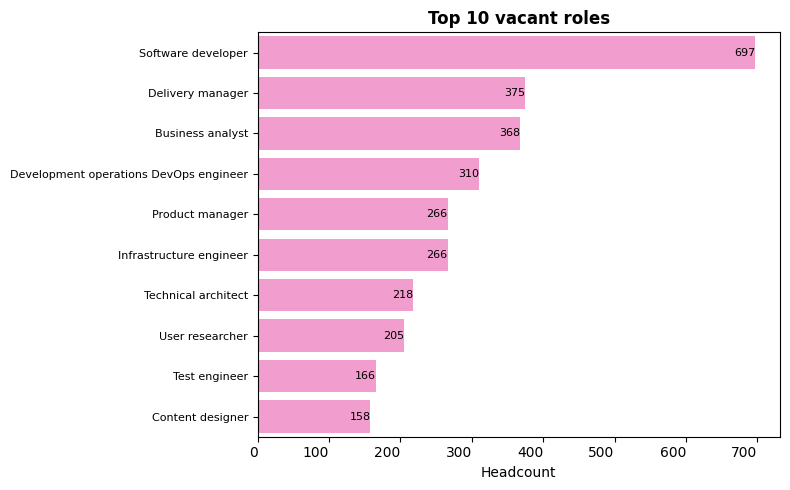

In [404]:
#create visual of the top 10 vacancies
#bar chart using Seaborn
plt.figure(figsize=(8, 5))  # Set the figure size
barplot = sns.barplot(y=Top_10_vacant_roles.index, x=Top_10_vacant_roles.values, color='#ff8fcf')  # Create the bar plot
plt.title('Top 10 vacant roles',fontweight='bold')  # Set the title of the plot
plt.xlabel('Headcount')  # Set the label for the x-axis
plt.ylabel('')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability

# Adjust font size of y-axis labels
plt.yticks(fontsize=8)  # Set the font size for y-axis labels
#Add labels to the end of each bar for headcount
for index, value in enumerate(Top_10_vacant_roles.values):
    barplot.text(value, index, str(value), va='center', ha='right', fontsize=8)

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()  # Display the plot




In [405]:
#print text on the total number of vacancies and vacancies as % of the total workforce
print("The workforce commission reported a total of",Total_vacancies,"vacancies which amounts to",round(Vacancy_percentage*100),"% of the total workforce (",Total_headcount,").")

The workforce commission reported a total of 5487 vacancies which amounts to 15 % of the total workforce ( 37611 ).


In [406]:
#Top vacant roles text
text1 = print(Top_10_vacant_roles.index[0],"was the top reported vacant role at",Top_10_vacant_roles.iloc[0],",followed by", Top_10_vacant_roles.index[1],Top_10_vacant_roles.iloc[1],"and",Top_10_vacant_roles.index[2],Top_10_vacant_roles.iloc[2],".")

Software developer was the top reported vacant role at 697 ,followed by Delivery manager 375 and Business analyst 368 .


In [407]:
#Define the plot
vacancy_plot = barplot.get_figure()


In [408]:
#Save the plot to a file
vacancy_plot.savefig('vacancy_plot.png')

In [409]:
#Headcount plot
headcount_plot =headcount_barplot.get_figure()
headcount_plot.savefig('headcount_plot.png')

In [410]:
#8.1 Location data
location_headcount = wfc_excluding_vacancies['Region'].value_counts().head(16)
print(location_headcount)

Region
London                      5256
South West (England)        3096
Wales                       2687
North West (England)        2638
Scotland                    2619
North East (England)        2181
Yorkshire and The Humber    1513
West Midlands               1465
South East (England)        1118
Home Worker                  548
East of England              491
East Midlands (England)      320
Northern Ireland              71
Overseas                      47
Yorkshire and the Humber      14
Name: count, dtype: int64


In [411]:
#Create a word document
doc = Document()

In [412]:
#Add a heading to the Word document
doc.add_heading('1. Size of the workforce', level=0)

#Add text on the overall vacancies to the word document
doc.add_paragraph(f"There are {Filled_headcount} Government Digital and Data professionals working across the government. This includes contingent labour but does not include vacancies.")
# Add the plot image to the Word document
doc.add_picture('headcount_plot.png', width=Inches(6))  # Adjust the width as needed

#Add a heading to the Word document
doc.add_heading('2. Skills and roles', level=0)
#Top 5 filled roles
doc.add_paragraph(f"The top 5 filled roles are {Top_filled_roles}.")
#Employee grade breakdown
doc.add_paragraph(f"The employee grade breakdown is {Employee_grade_counts}.")
#SCS breakdown
doc.add_paragraph(f"The SCS breakdown is:{SCS_all_counts}.")
doc.add_paragraph(f"The total number of SCS is {SCS_Total}.")

#Add a heading to the Word document
doc.add_heading('3. Demand and vacancy', level=0)

# Add the plot image to the Word document
doc.add_picture('vacancy_plot.png', width=Inches(6))  # Adjust the width as needed

# Add text to the Word document
#Add text on the overall vacancies to the word document
doc.add_paragraph(f"The workforce commission reported a total of {Total_vacancies} vacancies which amounts to {round(Vacancy_percentage*100)}% of the total workforce ({Total_headcount}).")

# Add text on the top vacant roles to the word document
doc.add_paragraph(f"{Top_10_vacant_roles.index[0]} was the top reported vacant role at {Top_10_vacant_roles.iloc[0]}, followed by {Top_10_vacant_roles.index[1]} {Top_10_vacant_roles.iloc[1]} and {Top_10_vacant_roles.index[2]} {Top_10_vacant_roles.iloc[2]}.")

#Add a heading to the Word document
doc.add_heading('4. Workforce mix', level=0)
#Workforce mix stats
doc.add_paragraph(f"Civil service proportion: {round(Civil_service_proportion*100)}%.")
doc.add_paragraph(f"Contingent labour proportion: {round(Contractor_proportion*100)}%.")

doc.add_paragraph(f"Top 10 contractor roles: {round(Top_10_contractors)}.")

#Add a heading to the Word document
doc.add_heading('5. Development programmes', level=0)
#Add a heading to the Word document
doc.add_heading('6. Pay and retention', level=0)
#Add a heading to the Word document
doc.add_heading('7. Location', level=0)
doc.add_paragraph(f"{location_headcount}")

# Save the Word document
wfc_test_doc = 'wfc_test_document.docx'
doc.save(wfc_test_doc)

print(f"Word document created successfully: {wfc_test_doc}")

# Display the plot
plt.show()

Word document created successfully: wfc_test_document.docx
